Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers

# # Define a Sequential model to include data augmentation layers
# data_augmentation = tf.keras.Sequential([
  
#   # Randomly flip images 
#   layers.RandomFlip("horizontal_and_vertical"),

#   # Randomly rotate images by a fraction of 2π
#   layers.RandomRotation(0.2),
  
#   # Randomly zoom images in and out
#   layers.RandomZoom(0.2),
  
#   # Randomly adjust the brightness of images
#    layers.RandomBrightness(0.2)
# ])

# # Example: Applying the data augmentation to a dataset
# (train_ds, val_ds, test_ds), metadata = tf.keras.utils.image_dataset_from_directory(
#     'path/to/dataset',
#     labels='inferred',
#     label_mode='int',
#     class_names=None,
#     color_mode='rgb',
#     batch_size=32,
#     image_size=(256, 256),
#     shuffle=True,
#     seed=123,
#     validation_split=0.2,
#     subset="training",
#     interpolation='bilinear',
#     follow_links=False,
# )

# # Apply the data augmentation to the training dataset
# train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))


In [ ]:

# # Define data augmentation
# data_augmentation = keras.Sequential([

#     layers.RandomFlip("horizontal_and_vertical"),

#     # Randomly rotate images by a fraction of 2π
#     layers.RandomRotation(0.2),

#     # Randomly zoom images in and out
#     layers.RandomZoom(0.2),

#     # Randomly adjust the brightness of images
#     layers.RandomBrightness(0.2)
# ])
# #     layers.experimental.preprocessing.RandomFlip("horizontal", 
# #                                                  input_shape=(img_height, 
# #                                                               img_width,
# #                                                               3)),
# #     layers.experimental.preprocessing.RandomRotation(0.1),
# #     layers.experimental.preprocessing.RandomZoom(0.1),
# # ])

# # Add data augmentation to the beginning of the model
# model.layers.insert(0, data_augmentation)

# """In this code, we first create the model using the create_simplified_vgg16_model function. 
# We then define the data augmentation layers in a separate Sequential model. 
# Finally, we add the data augmentation layers to the beginning of the model using the insert method.
# Note that we specify the input_shape argument in the RandomFlip layer to match the input shape of the model. 
# The other data augmentation layers will automatically infer their input shape from the preceding layer."""

In [ ]:
# def create_simplified_vgg16_model():
#     # Data augmentation
#     data_augmentation = keras.Sequential([
#         layers.experimental.preprocessing.RandomFlip("horizontal", 
#                                                      input_shape=(img_height, 
#                                                                   img_width,
#                                                                   3)),
#         layers.experimental.preprocessing.RandomRotation(0.1),
#         layers.experimental.preprocessing.RandomZoom(0.1),
#     ])

#     # Create a Sequential model
#     model = Sequential([
#         # Add the data augmentation layer
#         data_augmentation,

#         # Normalize pixel values between 0 and 1
#         layers.experimental.preprocessing.Rescaling(1./255),

#         # Convolutional block 1
#         Conv2D(32, (3, 3), activation='relu', padding='same'),
#         MaxPooling2D(pool_size=(2, 2)),

#         # Convolutional block 2
#         Conv2D(64, (3, 3), activation='relu', padding='same'),
#         MaxPooling2D(pool_size=(2, 2)),

#         # Convolutional block 3
#         Conv2D(128, (3, 3), activation='relu', padding='same'),
#         MaxPooling2D(pool_size=(2, 2)),

#         # Flatten layer
#         Flatten(),

#         # Fully connected layers
#         Dense(128, activation='relu'),
#         Dense(9, activation='softmax')
#     ])

#     return model


In [ ]:
# import pathlib
# import tensorflow as tf
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import os
# import PIL
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential

# # Defining the path for train and test images
# ## Todo: Update the paths of the train and test dataset
# data_dir_train = pathlib.Path("./Skin cancer ISIC The International Skin Imaging Collaboration/Train")
# data_dir_test = pathlib.Path('./Skin cancer ISIC The International Skin Imaging Collaboration/Test')

# # Count the number of images in the training data directory
# # This is done by listing all files with .jpg extension in all subdirectories
# # of the training data directory and getting the length of the list
# image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
# # Print the number of images in the training data directory
# print(image_count_train)

# # Count the number of images in the testing data directory
# # This is done by listing all files with .jpg extension in all subdirectories
# # of the testing data directory and getting the length of the list
# image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
# # Print the number of images in the testing data directory
# print(image_count_test)

# batch_size = 32
# img_height = 180
# img_width = 180

# ## Write your train dataset here
# ## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
# ## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     data_dir_train,
#     # labels='inferred', #the labels are automatically inferred from the subdirectory names.
#     # label_mode='int', #The labels are encoded as integers
#     validation_split=0.2,
#     subset="training",
#     seed=123,
#     image_size=(img_height, img_width),
#     batch_size=batch_size)

#     ## Write your validation dataset here
# ## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
# ## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     data_dir_train,
#     # labels='inferred',
#     # label_mode='int',
#     validation_split=0.2,
#     subset="validation",
#     seed=123,
#     image_size=(img_height, img_width),
#     batch_size=batch_size)

#     # List out all the classes of skin cancer and store them in a list.
# # You can find the class names in the class_names attribute on these datasets.
# # These correspond to the directory names in alphabetical order.
# class_names = train_ds.class_names # correspond to the directory names in alphabetical order.
# print(class_names)

# # Set AUTOTUNE to tf.data.experimental.AUTOTUNE to dynamically adjust the prefetch buffer size based on the system environment.
# # represents the best possible performance for data prefetching.
# AUTOTUNE = tf.data.experimental.AUTOTUNE

# # Cache the train dataset in memory, shuffle the data randomly and prefetch elements from the dataset for faster data retrieval.
# # Shuffling with a buffer of 1000 ensures that the data is well mixed.
# # The argument 1000 represents the buffer size for shuffling, which determines how many elements are shuffled at a time.
# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# # Cache the validation dataset in memory and prefetch elements from the dataset for faster data retrieval.
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# counts = []
# for c in class_names:
#     counts.append(len(list(data_dir_train.glob(str(c) + '/*.jpg'))))

# # Create a DataFrame with the counts
# class_dist = pd.DataFrame({'class': class_names, 'count': counts})




In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2024-03-13 18:11:41.221105: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-13 18:11:42.551150: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2024-03-13 18:11:42.551247: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/

In [3]:
# # If you are using the data by mounting the google drive, use the following :
# from google.colab import drive
# drive.mount('/content/gdrive/')

# #Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

# # Defining the path for train and test images
# ## Todo: Update the paths of the train and test dataset
# data_dir_train = pathlib.Path("./gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
# data_dir_test = pathlib.Path("./gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

ModuleNotFoundError: No module named 'google.colab'

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# # Make sure to place this code at the beginning of your program, before any models or tensors are created
# #  Ensure that the GPU configuration is the first thing you set up in your TensorFlow environment
# # Allow memory growth for the GPU
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# if physical_devices:
#     tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("./Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('./Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [3]:
# Count the number of images in the training data directory
# This is done by listing all files with .jpg extension in all subdirectories
# of the training data directory and getting the length of the list
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
# Print the number of images in the training data directory
print(image_count_train)

# Count the number of images in the testing data directory
# This is done by listing all files with .jpg extension in all subdirectories
# of the testing data directory and getting the length of the list
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
# Print the number of images in the testing data directory
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [4]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    # labels='inferred', #the labels are automatically inferred from the subdirectory names.
    # label_mode='int', #The labels are encoded as integers
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    # labels='inferred',
    # label_mode='int',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names # correspond to the directory names in alphabetical order.
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

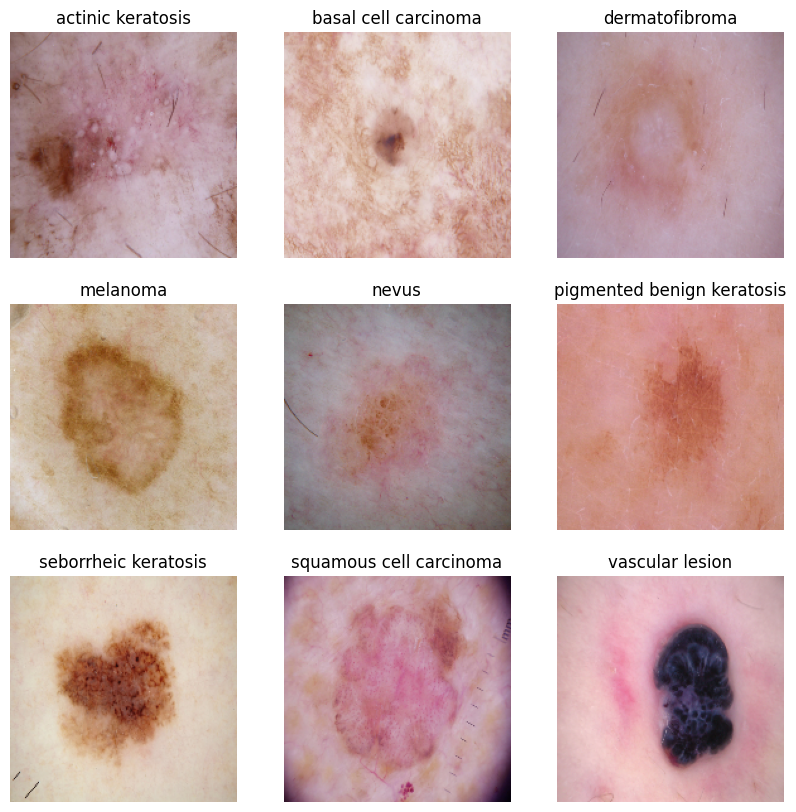

In [23]:
# Create a dictionary to store one image per class
images_per_class = {}

# # Iterate over the train dataset and store the first image of each class
# for image, label in train_ds: #label is a tensor object in TensorFlow, with shape (32,). Each element represents the label for one image in the batch.
#   for im, l in zip(image, label): #loop through each element in the tensor

#   # Check if the label is already in the dictionary
#     if l.numpy() in images_per_class:
#       # Skip the image
#       continue
#     else:
#       # Store the image in the dictionary
#       images_per_class[l.numpy()] = im
#       # Check if the dictionary has all the classes
#       if len(images_per_class) == 10:
#         # Break the loop
#         break

for image, label in train_ds:
    for im, l in zip(image, label):
        images_per_class.setdefault(l.numpy(), im) # setdefault() sets a value for a key in the dictionary only if the key is not already in the dictionary.
        if len(images_per_class) == 10:
            break
    if len(images_per_class) == 10:
        break

# for images, labels in train_ds.take(1): # Take one batch from the training dataset

plt.figure(figsize=(10, 10)) # Set the figure size

for label, image in images_per_class.items():
  ax = plt.subplot(3, 3, label + 1) # Create a subplot for each image
  plt.imshow(image.numpy().astype("uint8")) # Display the image
  plt.title(class_names[label]) # Set the title of the plot to the corresponding class name
  plt.axis("off") # Turn off the axis

plt.show()

## alternative from the web
# link: https://www.kaggle.com/code/pattnaiksatyajit/skin-cancer-detection-starter
# import matplotlib.image as mpimg
# plt.figure(figsize=(10,10))
# for i in range(9):
#   plt.subplot(3, 3, i + 1)
#   image = mpimg.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
# image = mpimg.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1])): This line is doing several things:

# data_dir_train.glob(class_names[i]+'/*.jpg'): This lists all the .jpg files in the directory of the current class.
# list(...)[1]: This converts the glob object to a list and selects the second file (Python uses 0-based indexing, so 1 is the second element).
# str(...): This converts the selected file's path to a string.
# mpimg.imread(...): This reads the image file and converts it to an array that can be used for plotting.
#   plt.title(class_names[i])
#   plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [9]:
# Set AUTOTUNE to tf.data.experimental.AUTOTUNE to dynamically adjust the prefetch buffer size based on the system environment.
# represents the best possible performance for data prefetching.
AUTOTUNE = tf.data.experimental.AUTOTUNE

# Cache the train dataset in memory, shuffle the data randomly and prefetch elements from the dataset for faster data retrieval.
# Shuffling with a buffer of 1000 ensures that the data is well mixed.
# The argument 1000 represents the buffer size for shuffling, which determines how many elements are shuffled at a time.
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# Cache the validation dataset in memory and prefetch elements from the dataset for faster data retrieval.
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# # Define the model
# model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])

# # Block 1
# model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(180, 180, 3)))
# model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# # Block 2
# model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# # Block 3
# model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# # Block 4
# model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# # Block 5
# model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# # Classification block
# model.add(Flatten())
# model.add(Dense(4096, activation='relu'))
# model.add(Dense(4096, activation='relu'))
# model.add(Dense(9, activation='softmax'))  # Assuming 9 classes for the output layer

# # Compile the model
# # model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# # Model summary
# model.summary()

# history = model.fit(
#     train_ds,
#     epochs=20,
#     validation_data=val_ds,
#     verbose=1
# )

In [ ]:
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
# num_classes = 9
# model = Sequential([
#                     layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
# ])
# model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
#                  activation ='relu', input_shape = (180, 180, 32)))
# model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))


# model.add(Flatten())
# model.add(Dense(num_classes, activation = "softmax"))

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# # View the summary of all layers
# model.summary()



In [10]:
# Importing required layers from tensorflow.keras to build model
from tensorflow.keras.layers import Conv2D     # Convolutional 2D Layer for image processing
from tensorflow.keras.layers import MaxPooling2D  # MaxPooling 2D Layer for downsampling input
from tensorflow.keras.layers import Flatten    # Flatten Layer for transforming input to 1D array
from tensorflow.keras.layers import Dense      # Dense Layer for output and hidden layers


In [11]:
# initialize create_vgg16_model function
def create_vgg16_model():

    # Clear the Keras session
    tf.keras.backend.clear_session()
    
    # Create a Sequential model
    model = Sequential([

        # layers.experimental.preprocessing.Rescaling(1./255) is used to normalize pixel values between [0, 1].
        # The RGB channel values are in the [0, 255] range, and this is not ideal for a neural network.
        # By dividing pixel values by 255, we can standardize them to be in the [0, 1] range.
        # Normalize pixel values between 0 and 1
        layers.experimental.preprocessing.Rescaling(1./255),

        # conv block 1
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        # conv block 2
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        # conv block 3
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        # conv block 4
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        # conv block 5
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        ## Classification block

        # flatten layer
        Flatten(),

        # Fully Connected Layers
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(9, activation='softmax')
    ])

    return model



In [13]:

# create the model
model = create_vgg16_model()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# build the model
model.build(input_shape=(None, img_height, img_width, 3))

# model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 128)       147584    
                                                        

In [15]:
# train the model
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
56/56 [==============================] - 97s 2s/step - loss: 2.1171 - accuracy: 0.1942 - val_loss: 2.0221 - val_accuracy: 0.1790
Epoch 2/20
56/56 [==============================] - 16s 289ms/step - loss: 2.0283 - accuracy: 0.1975 - val_loss: 2.0243 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 16s 291ms/step - loss: 2.0235 - accuracy: 0.1987 - val_loss: 2.0246 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 16s 294ms/step - loss: 2.0243 - accuracy: 0.1914 - val_loss: 2.0263 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 17s 295ms/step - loss: 2.0195 - accuracy: 0.2121 - val_loss: 2.0413 - val_accuracy: 0.1924
Epoch 6/20
56/56 [==============================] - 17s 296ms/step - loss: 2.0227 - accuracy: 0.1975 - val_loss: 2.0286 - val_accuracy: 0.1924
Epoch 7/20
56/56 [==============================] - 17s 298ms/step - loss: 2.0224 - accuracy: 0.2003 - val_loss: 2.0269 - val_accuracy: 0.1924
Ep

In [ ]:
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# def create_model():
#     # Create a Sequential model
#     model = Sequential([
#         # layers.experimental.preprocessing.Rescaling(1./255) is used to normalize pixel values between [0, 1].
#         # The RGB channel values are in the [0, 255] range, and this is not ideal for a neural network.
#         # By dividing pixel values by 255, we can standardize them to be in the [0, 1] range.
#         # Normalize pixel values between 0 and 1
#         layers.experimental.preprocessing.Rescaling(1./255), #input_shape=(img_height, img_width,3)),

#         # conv block 1
#         Conv2D(32, (3, 3), activation='relu', padding='same'), #input_shape=(img_height, img_width, 32)),
#         Conv2D(32, (3, 3), activation='relu', padding='same'),
#         MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

#         # conv block 2
#         Conv2D(64, (3, 3), activation='relu', padding='same'),
#         Conv2D(64, (3, 3), activation='relu', padding='same'),
#         MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

#         # conv block 3
#         Conv2D(128, (3, 3), activation='relu', padding='same'),
#         Conv2D(128, (3, 3), activation='relu', padding='same'),
#         # Conv2D(256, (3, 3), activation='relu', padding='same'),
#         MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

#         # # conv block 4
#         # Conv2D(512, (3, 3), activation='relu', padding='same'),
#         # Conv2D(512, (3, 3), activation='relu', padding='same'),
#         # Conv2D(512, (3, 3), activation='relu', padding='same'),
#         # MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

#         # # conv block 5
#         # Conv2D(512, (3, 3), activation='relu', padding='same'),
#         # Conv2D(512, (3, 3), activation='relu', padding='same'),
#         # Conv2D(512, (3, 3), activation='relu', padding='same'),
#         # MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

#         # flatten layer
#         Flatten(),

#         # Fully Connected Layers
#         # Dense(4096, activation='relu'),
#         # Dense(4096, activation='relu'),
#         Dense(1024, activation='relu'),
#         Dense(9, activation='softmax')
#     ])

#     return model

# # Compile the model
# model = create_model()

# # Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # model.build(input_shape=(None, img_height, img_width, 3))
# # model.summary()

# # train the model
# epochs = 20
# history = model.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=epochs
# )



Epoch 1/20


2024-03-12 15:51:00.162615: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-03-12 15:51:00.587079: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: Permission denied
2024-03-12 15:51:03.076064: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3bb83321d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-12 15:51:03.076124: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 3000 with Max-Q Design, Compute Capability 7.5
2024-03-12 15:51:03.086416: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1710233463.211716    4056 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


56/56 [==============================] - 24s 163ms/step - loss: 2.0061 - accuracy: 0.2656 - val_loss: 1.7442 - val_accuracy: 0.3624
Epoch 2/20
56/56 [==============================] - 6s 108ms/step - loss: 1.7632 - accuracy: 0.3588 - val_loss: 1.7182 - val_accuracy: 0.4206
Epoch 3/20
56/56 [==============================] - 6s 108ms/step - loss: 1.6308 - accuracy: 0.4330 - val_loss: 1.7303 - val_accuracy: 0.3736
Epoch 4/20
56/56 [==============================] - 6s 109ms/step - loss: 1.5717 - accuracy: 0.4347 - val_loss: 1.4719 - val_accuracy: 0.4922
Epoch 5/20
56/56 [==============================] - 6s 108ms/step - loss: 1.4514 - accuracy: 0.4989 - val_loss: 1.4726 - val_accuracy: 0.5168
Epoch 6/20
56/56 [==============================] - 6s 108ms/step - loss: 1.3689 - accuracy: 0.5301 - val_loss: 1.5254 - val_accuracy: 0.4832
Epoch 7/20
56/56 [==============================] - 6s 108ms/step - loss: 1.3960 - accuracy: 0.5117 - val_loss: 1.5742 - val_accuracy: 0.4586
Epoch 8/20
56/56

In [12]:
## simplified the model

# initialize create_simplified_vgg16_model function
def create_simplified_vgg16_model():
    
    # Clear the Keras session
    tf.keras.backend.clear_session()

    # Create a Sequential model
    model = Sequential([

        # Normalize pixel values between 0 and 1
        layers.experimental.preprocessing.Rescaling(1./255),

        # Convolutional block 1
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),

        # Convolutional block 2
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),

        # Convolutional block 3
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),

        # Flatten layer
        Flatten(),

        # Fully connected layers
        Dense(128, activation='relu'),
        Dense(9, activation='softmax')
    ])

    return model


In [20]:

# create the model
model = create_simplified_vgg16_model()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# build the model
model.build(input_shape=(None, img_height, img_width, 3))

# model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 90, 90, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 45, 45, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 45, 45, 128)      

In [21]:
# train the model
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
56/56 [==============================] - 6s 44ms/step - loss: 2.1373 - accuracy: 0.2204 - val_loss: 1.9391 - val_accuracy: 0.2461
Epoch 2/20
56/56 [==============================] - 2s 35ms/step - loss: 1.7789 - accuracy: 0.3538 - val_loss: 1.6575 - val_accuracy: 0.3982
Epoch 3/20
56/56 [==============================] - 2s 35ms/step - loss: 1.5123 - accuracy: 0.4732 - val_loss: 1.6364 - val_accuracy: 0.4228
Epoch 4/20
56/56 [==============================] - 2s 38ms/step - loss: 1.3816 - accuracy: 0.5179 - val_loss: 1.5341 - val_accuracy: 0.4653
Epoch 5/20
56/56 [==============================] - 2s 36ms/step - loss: 1.2956 - accuracy: 0.5391 - val_loss: 1.3693 - val_accuracy: 0.5302
Epoch 6/20
56/56 [==============================] - 2s 35ms/step - loss: 1.2297 - accuracy: 0.5625 - val_loss: 1.4825 - val_accuracy: 0.4720
Epoch 7/20
56/56 [==============================] - 2s 35ms/step - loss: 1.1245 - accuracy: 0.5971 - val_loss: 1.4821 - val_accuracy: 0.5324
Epoch 8/20
56

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


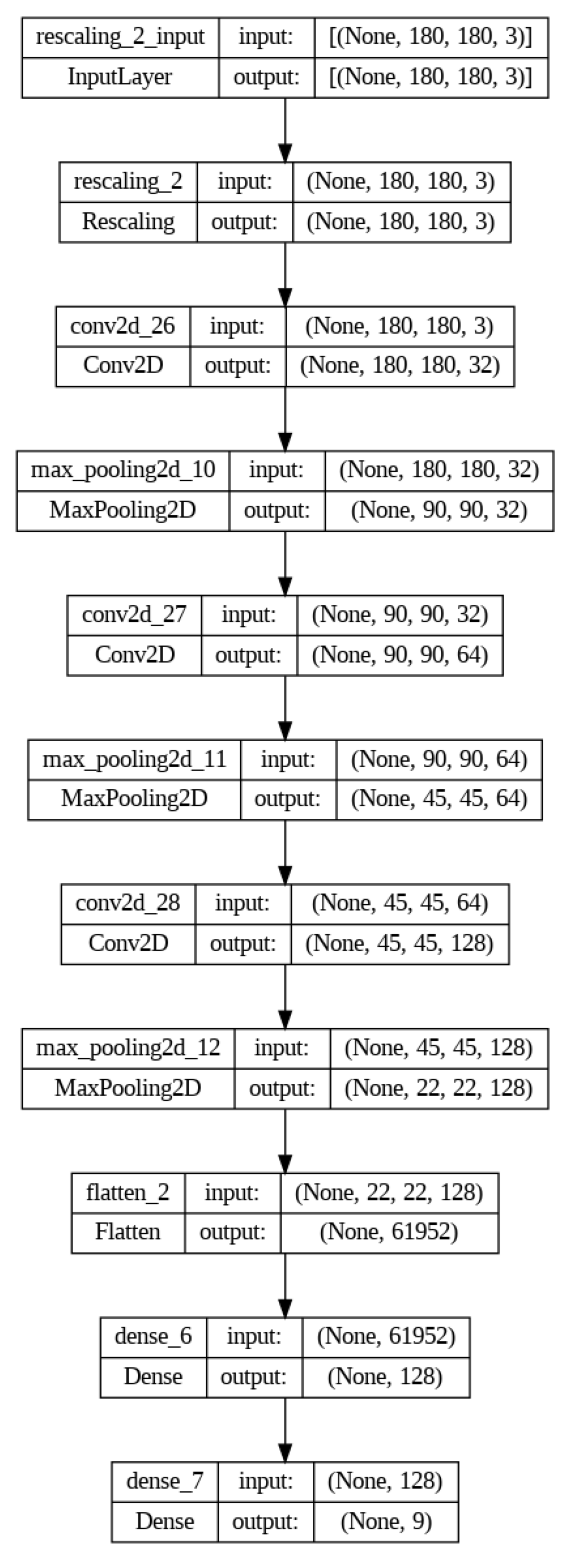

In [22]:
## visualize the model

# install required packages
!pip install pydot
!pip install pydotplus
!sudo apt-get install graphviz

# import required libraries
from tensorflow.keras.utils import plot_model

# plot the model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

plt.figure(figsize=(20, 20)) # Set the figure size

# Display the image
plt.imshow(plt.imread('model.png'))
plt.axis('off')
plt.show()


In [ ]:
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# def create_model():
#     # Create a Sequential model
#     model = Sequential([
#         # layers.experimental.preprocessing.Rescaling(1./255) is used to normalize pixel values between [0, 1].
#         # The RGB channel values are in the [0, 255] range, and this is not ideal for a neural network.
#         # By dividing pixel values by 255, we can standardize them to be in the [0, 1] range.
#         # Normalize pixel values between 0 and 1
#         layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),

#         # conv block 1
#         Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(img_height, img_width, 32)),
#         Conv2D(32, (3, 3), activation='relu', padding='same'),
#         MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

#         # conv block 2
#         Conv2D(64, (3, 3), activation='relu', padding='same'),
#         Conv2D(64, (3, 3), activation='relu', padding='same'),
#         MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

#         # conv block 3
#         Conv2D(128, (3, 3), activation='relu', padding='same'),
#         Conv2D(128, (3, 3), activation='relu', padding='same'),
#         MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),


#         # flatten layer
#         Flatten(),

#         # Fully Connected Layers
#         Dense(1000, activation='relu'),
#         # Dense(4096, activation='relu'),
#         Dense(9, activation='softmax')
#     ])

#     return model

# # Compile the model
# model = create_model()

# # Compile the model
# # model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# # train the model
# epochs = 20
# history = model.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=epochs
# )


In [ ]:
# # Create the model
# model = create_model()
# # model.summary()

In [ ]:
# ### Your code goes here
# # layers.experimental.preprocessing.Rescaling(1./255) is used to normalize pixel values between [0, 1].
# # The RGB channel values are in the [0, 255] range, and this is not ideal for a neural network.
# # By dividing pixel values by 255, we can standardize them to be in the [0, 1] range.

# # Create a Sequential model
# model = Sequential([
#     # Normalize pixel values between 0 and 1
#     layers.experimental.preprocessing.Rescaling(1./255),
#     # First convolutional layer with 32 filters, a kernel size of 3x3, and a ReLU activation
#     layers.Conv2D(32, 3, activation='relu'),
#     # Max pooling layer
#     # the 2D part indicates that the input is a 2-dimensional tensor, which is typical for image data.
#     # The default pool size for MaxPooling2D is 2x2, meaning the input is divided into 2x2 subregions.
#     # The maximum value from each subregion becomes the output value.
#     # The pooling operation is typically used to reduce the spatial size of the feature map while retaining the most important information
#     # This helps to reduce the number of parameters in the model and also makes it more efficient to process.
#     layers.MaxPooling2D(),
#     # Second convolutional layer with 32 filters, a kernel size of 3x3, and a ReLU activation
#     layers.Conv2D(64, 3, activation='relu'),
#     # Max pooling layer
#     layers.MaxPooling2D(),
#     # Third convolutional layer with 32 filters, a kernel size of 3x3, and a ReLU activation
#     layers.Conv2D(128, 3, activation='relu'),
#     # Max pooling layer
#     layers.MaxPooling2D(),
#     # Flatten layer to convert the 3D feature maps to a 1D vector
#     layers.Flatten(),
#     # Dense layer with 128 units and a ReLU activation
#     layers.Dense(128, activation='relu'),
#     # Final dense layer with 9 units for the 9 classes and a softmax activation
#     layers.Dense(9, activation='softmax')
# ])

# # This CNN model has three convolutional layers, three max pooling layers, a dense layer, and a softmax output laye

plot model

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [25]:
from keras.optimizers import SGD, RMSprop, Adam, AdamW, Adadelta, Adagrad, Adamax, Nadam, Ftrl

# Function to compile and train the model with different optimizers
def try_all_optimizers(epochs=10):
    optimizers = [SGD, RMSprop, Adam, AdamW, Adadelta, Adagrad, Adamax, Nadam, Ftrl]
    for opt in optimizers:
        model = create_simplified_vgg16_model()
        model.compile(optimizer=opt(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        print(f'Training with {opt.__name__} optimizer')
        history = model.fit( train_ds, validation_data=val_ds, epochs=epochs)
        print(f'{opt.__name__} Training Loss: {history.history["loss"][-1]}')
        print(f'{opt.__name__} Training Accuracy: {history.history["accuracy"][-1]}')
        print('-----------------------------------')

# Example usage:
try_all_optimizers()


Training with SGD optimizer
Epoch 1/10
56/56 [==============================] - 3s 38ms/step - loss: 2.0472 - accuracy: 0.2003 - val_loss: 2.0252 - val_accuracy: 0.3221
Epoch 2/10
56/56 [==============================] - 2s 35ms/step - loss: 2.0202 - accuracy: 0.2254 - val_loss: 2.0081 - val_accuracy: 0.2081
Epoch 3/10
56/56 [==============================] - 2s 35ms/step - loss: 2.0063 - accuracy: 0.2388 - val_loss: 1.9937 - val_accuracy: 0.2237
Epoch 4/10
56/56 [==============================] - 2s 38ms/step - loss: 1.9886 - accuracy: 0.2673 - val_loss: 1.9702 - val_accuracy: 0.3266
Epoch 5/10
56/56 [==============================] - 2s 36ms/step - loss: 1.9668 - accuracy: 0.2768 - val_loss: 1.9331 - val_accuracy: 0.2819
Epoch 6/10
56/56 [==============================] - 2s 34ms/step - loss: 1.9387 - accuracy: 0.2980 - val_loss: 1.8855 - val_accuracy: 0.2752
Epoch 7/10
56/56 [==============================] - 2s 34ms/step - loss: 1.9072 - accuracy: 0.2919 - val_loss: 1.9031 - val_ac

In [27]:
from keras.optimizers import SGD, RMSprop, Adam, AdamW, Adadelta, Adagrad, Adamax, Nadam, Ftrl

# Function to compile and train the model with different optimizers
def try_selected_optimizers(epochs=20):
    selected_optimizers = [Adam, AdamW, Nadam]
    for opt in selected_optimizers:
        model = create_simplified_vgg16_model()
        model.compile(optimizer=opt(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        print(f'Training with {opt.__name__} optimizer')
        history = model.fit( train_ds, validation_data=val_ds, epochs=epochs)
        print(f'{opt.__name__} Training Loss: {history.history["loss"][-1]}')
        print(f'{opt.__name__} Training Accuracy: {history.history["accuracy"][-1]}')
        print('-----------------------------------')

# Example usage:
try_selected_optimizers()


Training with Adam optimizer
Epoch 1/20
56/56 [==============================] - 4s 37ms/step - loss: 2.1471 - accuracy: 0.2355 - val_loss: 1.7584 - val_accuracy: 0.3647
Epoch 2/20
56/56 [==============================] - 2s 34ms/step - loss: 1.6779 - accuracy: 0.3912 - val_loss: 1.5968 - val_accuracy: 0.4161
Epoch 3/20
56/56 [==============================] - 2s 34ms/step - loss: 1.5053 - accuracy: 0.4732 - val_loss: 1.5451 - val_accuracy: 0.4966
Epoch 4/20
56/56 [==============================] - 2s 35ms/step - loss: 1.4739 - accuracy: 0.4760 - val_loss: 1.3568 - val_accuracy: 0.5660
Epoch 5/20
56/56 [==============================] - 2s 35ms/step - loss: 1.2651 - accuracy: 0.5575 - val_loss: 1.4977 - val_accuracy: 0.4765
Epoch 6/20
56/56 [==============================] - 2s 34ms/step - loss: 1.2033 - accuracy: 0.5820 - val_loss: 1.3421 - val_accuracy: 0.5324
Epoch 7/20
56/56 [==============================] - 2s 34ms/step - loss: 1.1150 - accuracy: 0.6032 - val_loss: 1.4055 - val_a

In [30]:
# ### Todo, choose an appropirate optimiser and loss function
# select Adam as apropriate
model = create_simplified_vgg16_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
# View the summary of all layers
model.build(input_shape=(None, img_height, img_width, 3))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_15 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_65 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 90, 90, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_66 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_50 (MaxPooli  (None, 45, 45, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_67 (Conv2D)          (None, 45, 45, 128)     

### Train the model

In [34]:
epochs = 20
history = model.fit(train_ds, 
                    validation_data=val_ds,
                    epochs=epochs)

Epoch 1/20
56/56 [==============================] - 3s 37ms/step - loss: 2.1205 - accuracy: 0.2271 - val_loss: 1.9885 - val_accuracy: 0.2774
Epoch 2/20
56/56 [==============================] - 2s 34ms/step - loss: 1.8465 - accuracy: 0.3225 - val_loss: 1.6780 - val_accuracy: 0.4273
Epoch 3/20
56/56 [==============================] - 2s 34ms/step - loss: 1.5504 - accuracy: 0.4576 - val_loss: 1.4782 - val_accuracy: 0.5190
Epoch 4/20
56/56 [==============================] - 2s 35ms/step - loss: 1.4014 - accuracy: 0.5190 - val_loss: 1.4160 - val_accuracy: 0.5190
Epoch 5/20
56/56 [==============================] - 2s 37ms/step - loss: 1.3376 - accuracy: 0.5290 - val_loss: 1.4649 - val_accuracy: 0.5190
Epoch 6/20
56/56 [==============================] - 2s 36ms/step - loss: 1.2780 - accuracy: 0.5452 - val_loss: 1.3696 - val_accuracy: 0.5302
Epoch 7/20
56/56 [==============================] - 2s 37ms/step - loss: 1.1449 - accuracy: 0.5831 - val_loss: 1.3508 - val_accuracy: 0.5369
Epoch 8/20
56

### Visualizing training results

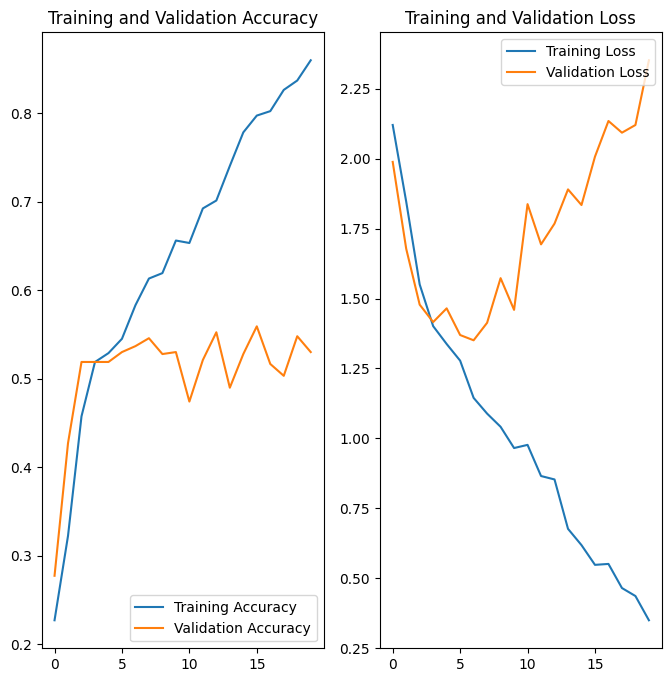

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

- The model accuracy on training data show promising improvment over the course of 20 epochs.
- There are indications of overfitting because validation accuracy is declining while training accuracy continue to rise.
- Apply data augmentation techniques to overcome overfitting.

### Write your findings here

In [33]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here

# ideas gotten from https://www.youtube.com/watch?v=o1zcWYrulEQ
# Define data augmentation
data_augmentation = keras.Sequential([

    layers.RandomFlip("horizontal_and_vertical"),

    # Randomly rotate images by a fraction of 2
    layers.RandomRotation(1),

    # # Randomly zoom images in and out
    # layers.RandomZoom(0.2),

    # Randomly adjust the brightness of images
    layers.RandomBrightness(0.2)
])



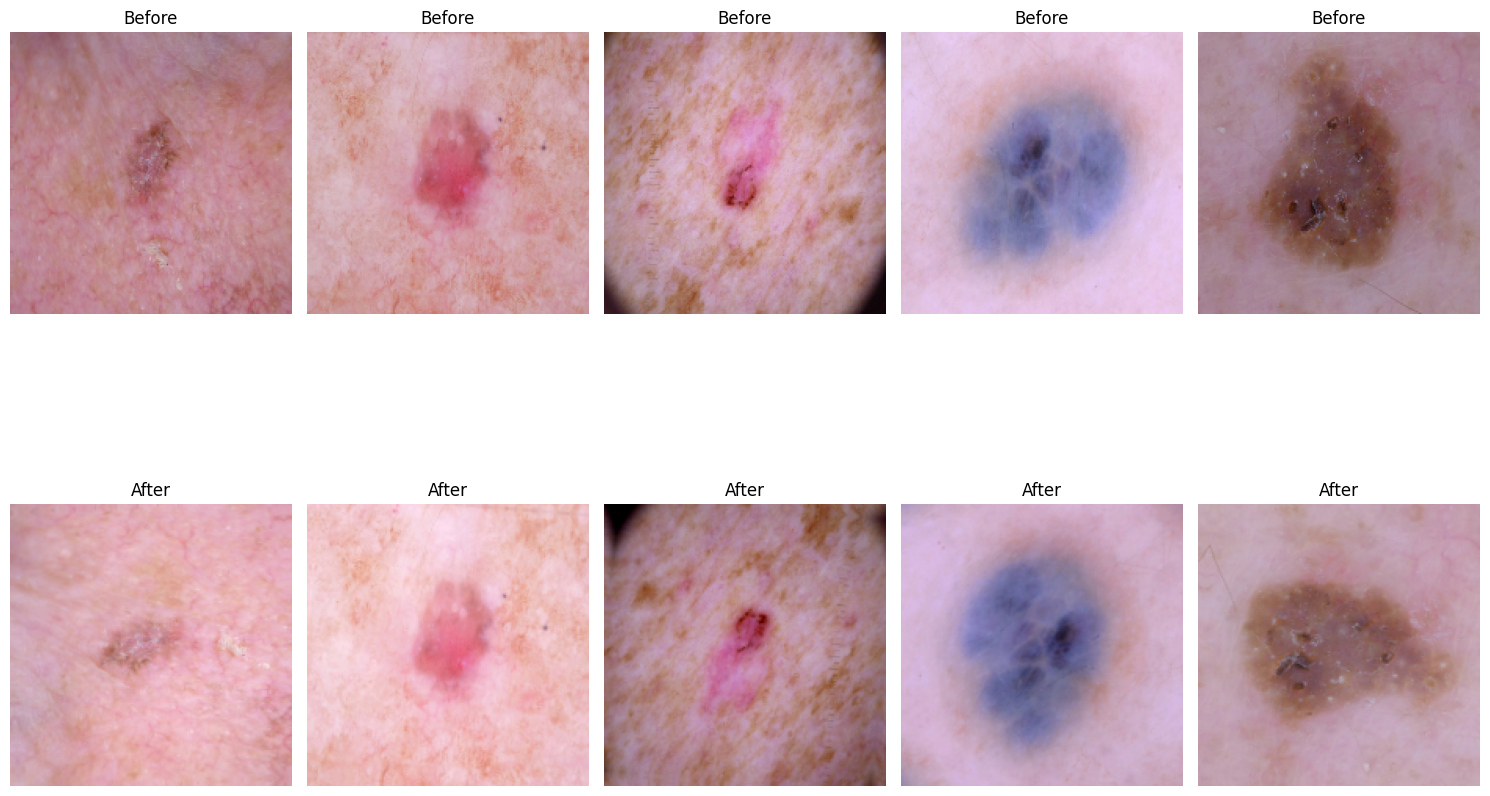

In [34]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

# Take one batch of images and labels from the training dataset
images, labels = next(iter(train_ds))

# Apply the data_augmentation layers to the batch of images
augmented_images = data_augmentation(images)

# Plot the original and augmented images
plt.figure(figsize=(15, 15))
for i in range(5):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")
    plt.title('Before')

    plt.subplot(3, 5, i + 6)
    plt.imshow(augmented_images[i].numpy().astype("uint8"))
    plt.axis("off")
    plt.title('After')

plt.tight_layout()

### Todo:
### Create the model, compile and train the model


In [47]:

# from tensorflow.keras.models import Model
# model = create_simplified_vgg16_model()
# # Assume 'model' is your original Keras model
# # Get the output of the first layer to be removed
# layer_output = model.layers[0].output

# # Create a new input layer (make sure to match the input shape of the second layer)
# new_input = model.layers[0].input

# # Rebuild the model from the second layer onwards
# new_model = Model(new_input, layer_output)

# # Add the rest of the layers from the original model to the new model
# for layer in model.layers[1:]:
#     new_model = Model(new_input, layer.output(new_model.output))

# # Now 'new_model' has the same layers as 'model', minus the first layer


AttributeError: Layer rescaling_18 has no inbound nodes.

In [58]:
# data_augmentation.build(input_shape=(None, img_height, img_width, 3))

# data_augmentation.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 180, 180, 3)       0         
                                                                 
 random_rotation_1 (RandomR  (None, 180, 180, 3)       0         
 otation)                                                        
                                                                 
 random_zoom_1 (RandomZoom)  (None, 180, 180, 3)       0         
                                                                 
 random_brightness_1 (Rando  (None, 180, 180, 3)       0         
 mBrightness)                                                    
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model: "sequential_140"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_68 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 random_flip_2 (RandomFlip)  (None, 180, 180, 3)       0         
                                                                 
 random_rotation_2 (RandomR  (None, 180, 180, 3)       0         
 otation)                                                        
                                                                 
 random_zoom_2 (RandomZoom)  (None, 180, 180, 3)       0         
                                                                 
 random_brightness_2 (Rando  (None, 180, 180, 3)       0         
 mBrightness)                                                    
                                                                 
 conv2d_201 (Conv2D)         (None, 180, 180, 32)   

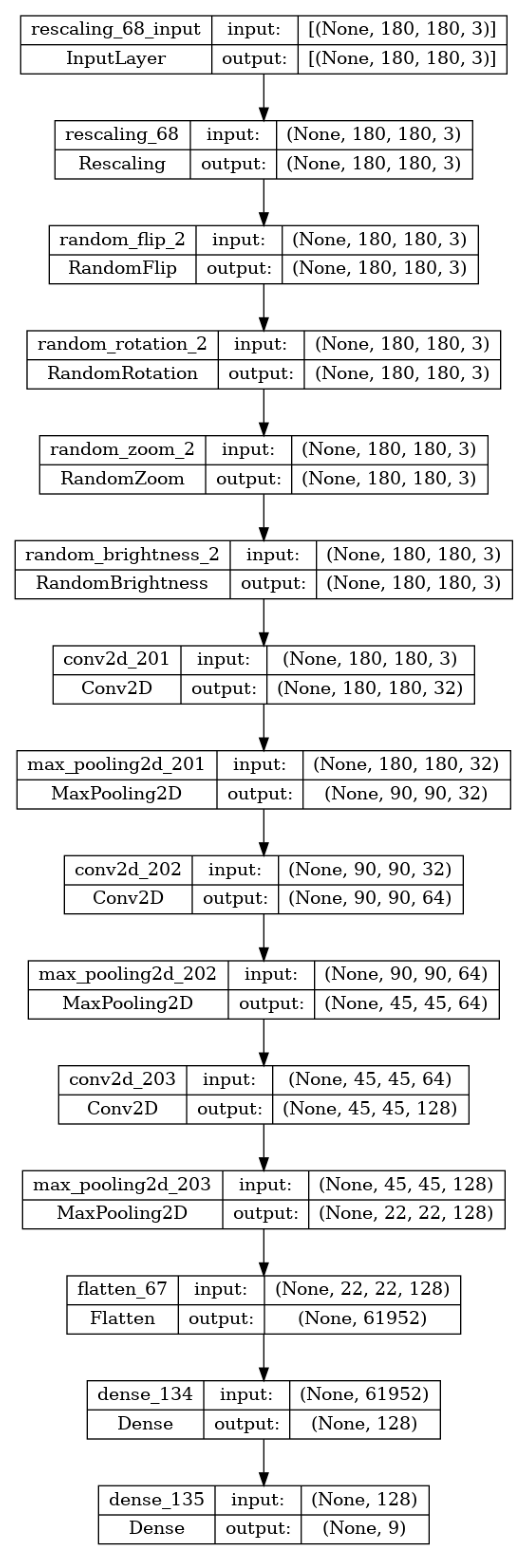

In [103]:
# # Create a simplified version of the VGG16 model
# old_model = create_simplified_vgg16_model()

# # Extract the first layer of the old model
# rescale_layers = Sequential(old_model.layers[0])

# # Extract the remaining layers of the old model
# remain_layers = Sequential(old_model.layers[1:])

# # initialize model
# model = Sequential()

# # Add the rescale layers to the new model
# [model.add(layer) for layer in rescale_layers.layers]

# # Add the data augmentation layers to the new model
# [model.add(layer) for layer in data_augmentation.layers]

# # Add the remaining layers of the old model to the new model
# [model.add(layer) for layer in remain_layers.layers]

# # build the model
# model.build(input_shape=(None, img_height, img_width, 3))

# # model summary
# model.summary()

# # plot the model
# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# plt.figure(figsize=(20, 20)) # Set the figure size

# # Display the image
# plt.imshow(plt.imread('model.png'))
# plt.axis('off')
# plt.show()

Model: "sequential_153"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_2 (RandomFlip)  (None, 180, 180, 3)       0         
                                                                 
 random_rotation_2 (RandomR  (None, 180, 180, 3)       0         
 otation)                                                        
                                                                 
 random_zoom_2 (RandomZoom)  (None, 180, 180, 3)       0         
                                                                 
 random_brightness_2 (Rando  (None, 180, 180, 3)       0         
 mBrightness)                                                    
                                                                 
 rescaling_72 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_213 (Conv2D)         (None, 180, 180, 32)   

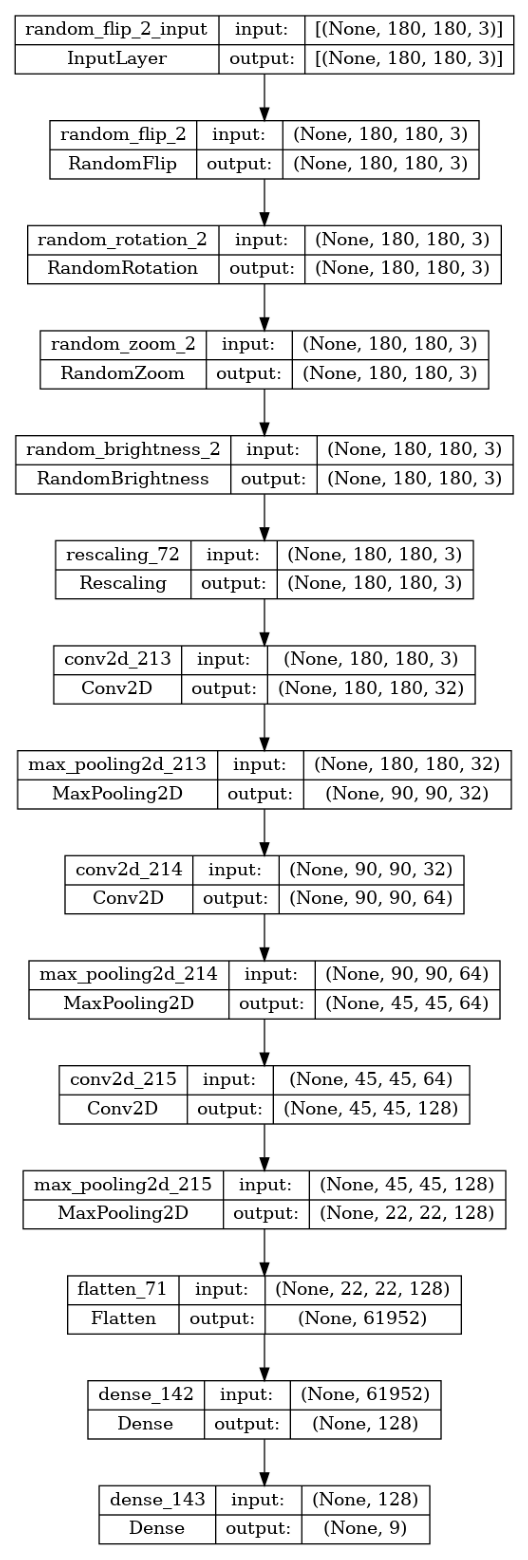

In [109]:
# Create a simplified version of the VGG16 model
old_model = create_simplified_vgg16_model()

# initialize new model
model = Sequential()

# Add the data augmentation layers to the new model
[model.add(layer) for layer in data_augmentation.layers]

# Add the old model layers to the new model
[model.add(layer) for layer in old_model.layers]

# build the model
model.build(input_shape=(None, img_height, img_width, 3))

# model summary
model.summary()

# plot the model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

plt.figure(figsize=(20, 20)) # Set the figure size

# Display the image
plt.imshow(plt.imread('model.png'))
plt.axis('off')
plt.show()

In [106]:
# # # create the model
# model = create_simplified_vgg16_model()

# # Compile the model
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # # Add data augmentation to the beginning of the model
# # model.layers.insert(0, data_augmentation)

# # train the model
# epochs = 20
# history = model.fit(train_ds, 
#                     validation_data=val_ds,
#                     epochs=epochs)

Epoch 1/20


56/56 [==============================] - 15s 172ms/step - loss: 2.2046 - accuracy: 0.2266 - val_loss: 1.9782 - val_accuracy: 0.2125
Epoch 2/20
56/56 [==============================] - 10s 153ms/step - loss: 1.7795 - accuracy: 0.3488 - val_loss: 1.6238 - val_accuracy: 0.4362
Epoch 3/20
 2/56 [>.............................] - ETA: 21s - loss: 1.6275 - accuracy: 0.3750 

KeyboardInterrupt: 

In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here



### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(train_ds, 
                    validation_data=val_ds,
                    epochs=epochs)

Epoch 1/20


56/56 [==============================] - 23s 299ms/step - loss: 2.0645 - accuracy: 0.2282 - val_loss: 1.8011 - val_accuracy: 0.3624
Epoch 2/20
56/56 [==============================] - 18s 311ms/step - loss: 1.7458 - accuracy: 0.3599 - val_loss: 1.5575 - val_accuracy: 0.4586
Epoch 3/20
56/56 [==============================] - 17s 286ms/step - loss: 1.6171 - accuracy: 0.4219 - val_loss: 1.6198 - val_accuracy: 0.4541
Epoch 4/20
56/56 [==============================] - 18s 299ms/step - loss: 1.5084 - accuracy: 0.4621 - val_loss: 1.4502 - val_accuracy: 0.4832
Epoch 5/20
56/56 [==============================] - 17s 293ms/step - loss: 1.4699 - accuracy: 0.4782 - val_loss: 1.5352 - val_accuracy: 0.4631
Epoch 6/20
56/56 [==============================] - 18s 302ms/step - loss: 1.5418 - accuracy: 0.4475 - val_loss: 1.5031 - val_accuracy: 0.4810
Epoch 7/20
56/56 [==============================] - 21s 367ms/step - loss: 1.4173 - accuracy: 0.4933 - val_loss: 1.4014 - val_accuracy: 0.5034
Epoch 8/20

### Visualizing the results

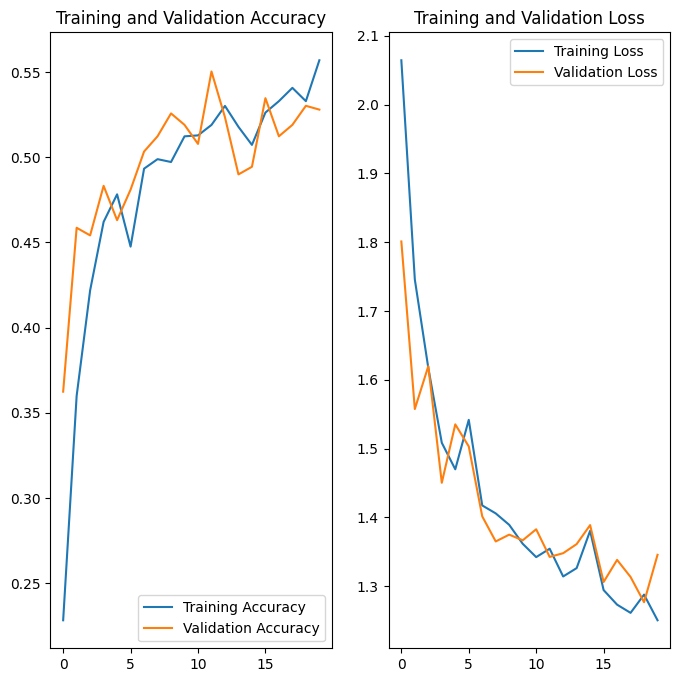

In [110]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

- __Model Underfit__: The training loss does not decrease significantly.
- __Improvement__: Compared to the previous model run, the model overfiting issue has been handled profoundly. However, the model still seems to be underfitting, and there is room for improvement.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

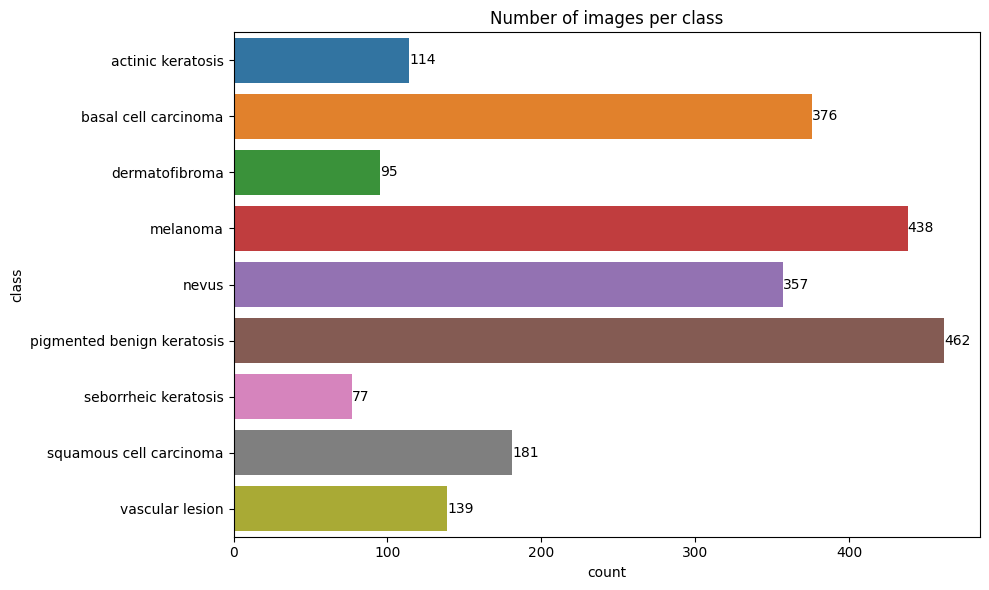

In [14]:
## Your code goes here.
# Get the count of images in each class
counts = []
for c in class_names:
    counts.append(len(list(data_dir_train.glob(str(c) + '/*.jpg'))))

# Create a DataFrame with the counts
class_dist = pd.DataFrame({'class': class_names, 'count': counts})

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=class_dist, y='class', x='count')
plt.title('Number of images per class')

# Add bar labels
ax.bar_label(ax.containers[0])

plt.tight_layout()
plt.show()



In [16]:
!pip install Augmentor

  Obtaining dependency information for Augmentor from https://files.pythonhosted.org/packages/f3/86/5a91176650eb229ea2cd95551c34c36fba6cd95da3bdc4a5c73fbb1536ca/Augmentor-0.2.12-py2.py3-none-any.whl.metadata


In [38]:

# Importing the Augmentor package for data augmentation
import Augmentor

import shutil

# Define the new directory
data_dir_train_aug = pathlib.Path("./Skin cancer ISIC The International Skin Imaging Collaboration/Train_augmentor")

shutil.rmtree(data_dir_train_aug)

# # Delete all output folders
# for c in class_names:
#     output_dir = data_dir_train_aug / c / "output"
#     shutil.rmtree(output_dir)

In [39]:
# Create the new directory
data_dir_train_aug.mkdir(parents=True, exist_ok=True)

# Unbatch the dataset
train_ds_unbatched = train_ds.unbatch()

# Initialize a counter
i = 0

# Iterate over the train_ds and copy the images to the new directory
for image, label in train_ds_unbatched:
    class_name = class_names[label.numpy()]
    new_class_dir = data_dir_train_aug / class_name
    new_class_dir.mkdir(parents=True, exist_ok=True)
    filename = f"image_{i}.jpg"
    tf.keras.preprocessing.image.save_img(new_class_dir / filename, image)
    i += 1

In [24]:
image_count_train_aug = len(list(data_dir_train_aug.glob('*/*.jpg')))
# Print the number of images in the training data directory
print(image_count_train_aug)

1792


In [17]:
# counts = []
# i=0
# for c in class_names:

#     # Count the total number of images in the class directory
#     counts.append(len(list(data_dir_train_aug.glob(str(c) + '/*.jpg'))))
#     print(type(counts[i]))
#     i+=1 


<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>


Initialised with 92 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train_augmentor/actinic keratosis/output.Initialised with 309 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train_augmentor/basal cell carcinoma/output.Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train_augmentor/dermatofibroma/output.Initialised with 352 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train_augmentor/melanoma/output.Initialised with 277 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train_augmentor/nevus/output.Initialised with 370 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train_augmentor/pigmented benign keratosis/output.Initialised with 58 image(s) f

Executing Pipeline:   0%|          | 0/708 [00:00<?, ? Samples/s]

Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7F7F444EF7D0>: 100%|██████████| 708/708 [00:02<00:00, 287.27 Samples/s]                  
Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7F7F44467350>: 100%|██████████| 491/491 [00:01<00:00, 296.83 Samples/s]                  
Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7F7EE447B990>: 100%|██████████| 723/723 [00:02<00:00, 285.54 Samples/s]                  
Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7F7EE4574410>: 100%|██████████| 448/448 [00:01<00:00, 265.07 Samples/s]                  
Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7F7F24080F90>: 100%|██████████| 523/523 [00:01<00:00, 304.39 Samples/s]                  
Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7F7EE44FC390>: 100%|██████████| 430/430 [00:01<00:00, 263.96 Samples/s]                  
Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7F7F2410EB90>: 100%|██████████| 7

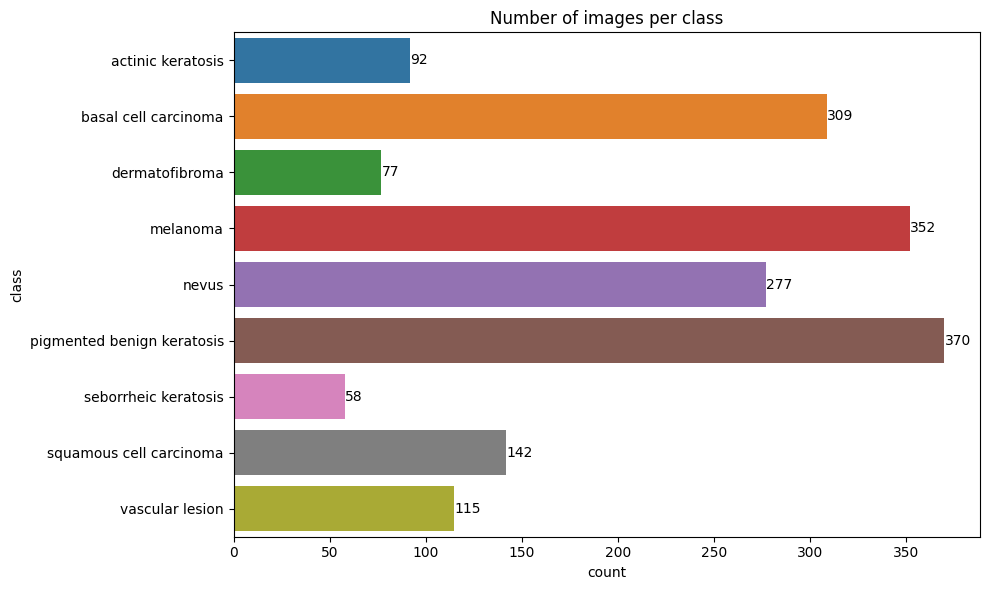

In [40]:
counts = []
for c in class_names:

    # Count the total number of images in the class directory
    counts.append(len(list(data_dir_train_aug.glob(str(c) + '/*.jpg'))))

# Augment training data
augmentors = []

# Loop through each class name
for c in class_names:

    # Create Augmentor pipeline for class
    p = Augmentor.Pipeline(data_dir_train_aug / c) 

    # Add data augmentation operations
    # Rotate images randomly between -5 and 5 degrees
    p.rotate(probability=0.5, max_left_rotation=5, max_right_rotation=5)
    
    p.rotate_random_90(probability=0.5)

    # # Zoom images randomly between 0.8x and 1.2x original size
    # p.zoom(probability=0.5, min_factor=1.1, max_factor=1.3)

    # Flip images randomly both axes with 50% probability
    p.flip_random(probability=0.5) 

    # Add the random_distortion operation to the pipeline
    p.random_distortion(probability=0.5, grid_width=8, grid_height=8, magnitude=4)

    p.skew(probability=0.5, magnitude=0.6)

    # Add pipeline to list
    augmentors.append(p)



# Get count of images in class with most images  
target_count = 800

# Sample images from each pipeline to target count
for i, p in enumerate(augmentors):
    if (target_count - counts[i]) == 0: continue
    p.sample(target_count - counts[i])

# Create a DataFrame with the counts
train_ds_dist = pd.DataFrame({'class': class_names, 'count': counts})

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=train_ds_dist, y='class', x='count')
plt.title('Number of images per class')

# Add bar labels
ax.bar_label(ax.containers[0])

plt.tight_layout()
plt.show()

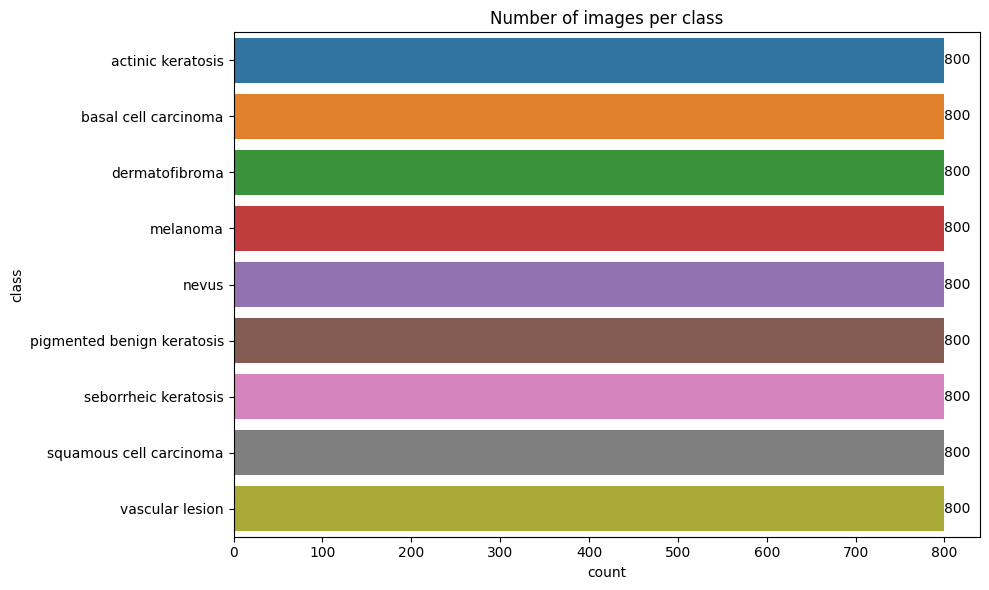

In [17]:
counts = []
for c in class_names:

    # Count the total number of images in the class directory
    num_images = len(list(data_dir_train_aug.glob(str(c) + '/*.jpg')))
    
    # Count the number of images in the output folder in the class directory
    output_images = len(list(data_dir_train_aug.glob(str(c) + '/output/*.jpg')))

    # Add the counts to the list
    counts.append(num_images + output_images)

    # Create a DataFrame with the counts
train_ds_dist = pd.DataFrame({'class': class_names, 'count': counts})

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=train_ds_dist, y='class', x='count')
plt.title('Number of images per class')

# Add bar labels
ax.bar_label(ax.containers[0])

plt.tight_layout()
plt.show()

114
348
376
86
95
367
438
24
357
105
462
462
77
385
181
281
139
323


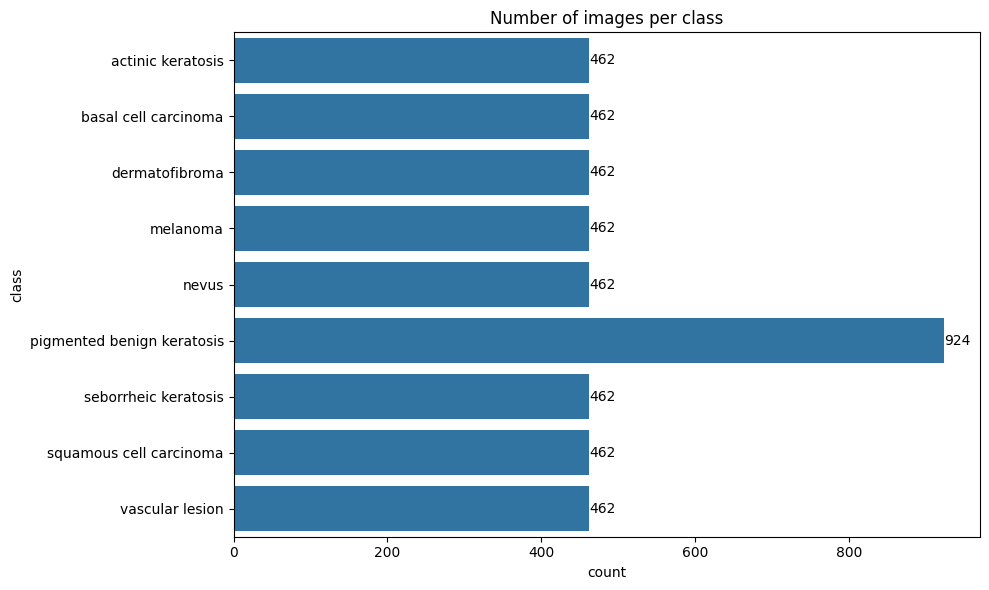

In [23]:
# ## Your code goes here.
# # Get the count of images in each class
# counts = []
# for c in class_names:

#     # Count the total number of images in the class directory
#     num_images = len(list(data_dir_train.glob(str(c) + '/*.jpg')))
#     print (num_images)
#     # Count the number of images in the output folder in the class directory
#     output_images = len(list(data_dir_train.glob(str(c) + '/output/*.jpg')))
#     print(output_images)

#     # Add the counts to the list
#     counts.append(num_images + output_images)

# # Create a DataFrame with the counts
# class_dist = pd.DataFrame({'class': class_names, 'count': counts})

# # Create a bar plot
# plt.figure(figsize=(10, 6))
# ax = sns.barplot(data=class_dist, y='class', x='count')
# plt.title('Number of images per class')

# # Add bar labels
# ax.bar_label(ax.containers[0])

# plt.tight_layout()
# plt.show()



In [41]:
import shutil

for c in class_names:
    output_dir = data_dir_train_aug / c / 'output'
    for filename in os.listdir(output_dir):
        shutil.move(os.path.join(output_dir, filename), os.path.join(data_dir_train_aug, c))

    # Delete the empty output folder
    shutil.rmtree(output_dir)


In [42]:
# Define the new train_ds dataset
train_ds_aug = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train_aug,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 7200 files belonging to 9 classes.


In [27]:
# # # Compile the model
# # model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # # build the model
# # model.build(input_shape=(None, img_height, img_width, 3))

# # model summary
# model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 180, 180, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 180, 180, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 180, 180, 3)       0         
                                                                 
 random_brightness (RandomBr  (None, 180, 180, 3)      0         
 ightness)                                                       
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 64)     

In [33]:
# num_images = 0
# for images, labels in train_ds_aug:
#     num_images += images.shape[0]
# print(num_images)

3330


In [75]:
# Convert the datasets to numpy arrays for GridSearchCV
x_train = np.concatenate([x for x, y in train_ds_aug], axis=0)
y_train = np.concatenate([y for x, y in train_ds_aug], axis=0)
print(len(x_train))
x_val = np.concatenate([x for x, y in val_ds], axis=0)
y_val = np.concatenate([y for x, y in val_ds], axis=0)
print(len(x_val))

# # Convert the datasets to numpy arrays
# x_train = np.concatenate([x[None, :] for x, y in train_ds_unbatched], axis=0)
# y_train = np.array([y for x, y in val_ds_unbatched])
# print(len(y_train))

# x_val = np.concatenate([x[None, :] for x, y in val_ds_unbatched], axis=0)
# y_val = np.array([y for x, y in val_ds])
# print(y_val)

# x_val, y_val = zip(*val_ds)
# x_val = np.array(x_val)
# y_val = np.array(y_val)

# print(y_val)


7200
447


In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def create_model():
    # Create a simplified version of the VGG16 model
    old_model = create_simplified_vgg16_model()

    # initialize new model
    model = Sequential()

    # Add the data augmentation layers to the new model
    [model.add(layer) for layer in data_augmentation.layers]

    # Add the old model layers to the new model
    [model.add(layer) for layer in old_model.layers]
    return model

# Wrap Keras model with KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'beta_1': [0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99],
    'beta_2': [0.999, 0.9995, 0.9999],
    'epsilon': [1e-7, 1e-8],
    'decay': [0.0, 0.01, 0.1],
    'amsgrad': [False, True]
}

# Convert the datasets to numpy arrays for GridSearchCV
x_train = np.concatenate([x for x, y in train_ds_aug], axis=0)
y_train = np.concatenate([y for x, y in train_ds_aug], axis=0)

x_val = np.concatenate([x for x, y in val_ds], axis=0)
y_val = np.concatenate([y for x, y in val_ds], axis=0)

# Combine the training and validation sets
x_combined = np.vstack((x_train, x_val))
y_combined = np.hstack((y_train, y_val))

# Create an array where training instances are -1 and validation instances are 0
test_fold = np.concatenate([
    -np.ones(len(x_train)), # Training set
    np.zeros(len(x_val))    # Validation set
])

# Create the PredefinedSplit based on the test_fold array
ps = PredefinedSplit(test_fold)
# in this code snippet, test_fold is an array that assigns a unique fold number to each sample.
#  Samples with a fold number of -1 are always used as training data, and samples with 0 are used for testing 
# (or validation in this case). The PredefinedSplit object ps is then used as the cv argument in GridSearchCV. 
# This allows you to use your predefined training and validation sets during the grid search process. 
# Remember to include this definition before initializing GridSearchCV with ps as the cv parameter.

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=ps)

# Run GridSearchCV
grid_result = grid.fit(x_train, y_train, validation_data=(x_val, y_val))


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......random_brightness
.........vars
......random_flip
.........vars
......random_rotation
.........vars
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2024-03-13 20:10:20          861
variables.h5                                   2024-03-13 20:10:20         8072
metadata.json                                  2024-03-13 20:10:20           64
File Name                                             Modified             Size
config.json                                    2024-03-13 20:10:20          861
variables.h5                                   2024-03-13 20:10:20         8072
metadata.json                                  2024-03-13 20:10:20           64


In [43]:
# Create a simplified version of the VGG16 model
# old_model = create_simplified_vgg16_model()
# model = create_simplified_vgg16_model()
old_model = create_simplified_vgg16_model()

# initialize new model
model = Sequential()

# Add the data augmentation layers to the new model
[model.add(layer) for layer in data_augmentation.layers]

# Add the old model layers to the new model
[model.add(layer) for layer in old_model.layers]

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_ds_aug,
    epochs=20,
    validation_data=val_ds,
    verbose=1
)

Epoch 1/20


225/225 [==============================] - 28s 104ms/step - loss: 1.7542 - accuracy: 0.3261 - val_loss: 1.5748 - val_accuracy: 0.3870
Epoch 2/20
225/225 [==============================] - 23s 104ms/step - loss: 1.4954 - accuracy: 0.4157 - val_loss: 1.5620 - val_accuracy: 0.4228
Epoch 3/20
225/225 [==============================] - 23s 103ms/step - loss: 1.4450 - accuracy: 0.4268 - val_loss: 1.4177 - val_accuracy: 0.5056
Epoch 4/20
225/225 [==============================] - 23s 101ms/step - loss: 1.4080 - accuracy: 0.4462 - val_loss: 1.4925 - val_accuracy: 0.4340
Epoch 5/20
225/225 [==============================] - 23s 102ms/step - loss: 1.3678 - accuracy: 0.4711 - val_loss: 1.5062 - val_accuracy: 0.4877
Epoch 6/20
225/225 [==============================] - 23s 101ms/step - loss: 1.3275 - accuracy: 0.4792 - val_loss: 1.4342 - val_accuracy: 0.4922
Epoch 7/20
225/225 [==============================] - 23s 101ms/step - loss: 1.2943 - accuracy: 0.4879 - val_loss: 1.4119 - val_accuracy: 0.4

In [ ]:

# Define the augmentation pipeline for each class
augmentors = []
for c in class_names:
    p = Augmentor.Pipeline(data_dir_train / c)
    # Add augmentation operations here
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)
    p.flip_left_right(probability=0.5)
    p.flip_top_bottom(probability=0.5)
    augmentors.append(p)

# Define the number of images to generate for each class
target_count = max(counts)

# Generate augmented images for each class
for i, p in enumerate(augmentors):
    p.sample(target_count - counts[i])


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


- __Least Samples__: The class with the least number of samples is seborrheic keratosis.
- __Most Samples__: The classes that dominate the data with the most samples are melanoma and pigmented benign keratosis.

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [1]:
!pip install Augmentor

Defaulting to user installation because normal site-packages is not writeable


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset="To do"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [ ]:
new_df['Label'].value_counts()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here

#### **Todo:**  Train your model

In [ ]:
epochs = 30
## Your code goes here, use 50 epochs.
history = # your model fit code

#### **Todo:**  Visualize the model results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

